In [72]:
import helper
from nilearn.maskers import NiftiMasker

In [73]:
Original_DBMs = load_img("/data/origami/niusha/input/DBM_data.nii")
data = Original_DBMs.get_fdata()

In [74]:
nifti_masker = NiftiMasker(standardize=True,
                           target_affine=Original_DBMs.affine,
                           )

Original_DBMs_masked_data = nifti_masker.fit_transform(Original_DBMs)    

In [75]:
imges = nifti_masker.inverse_transform(Original_DBMs_masked_data)

     ======== General Information ========
Number of nan voxels: 0
Overall Maximum: 18.5379
Overall Minimum: 0.0000
Overall Mean: -16.7117
Overall Variance: 0.2023


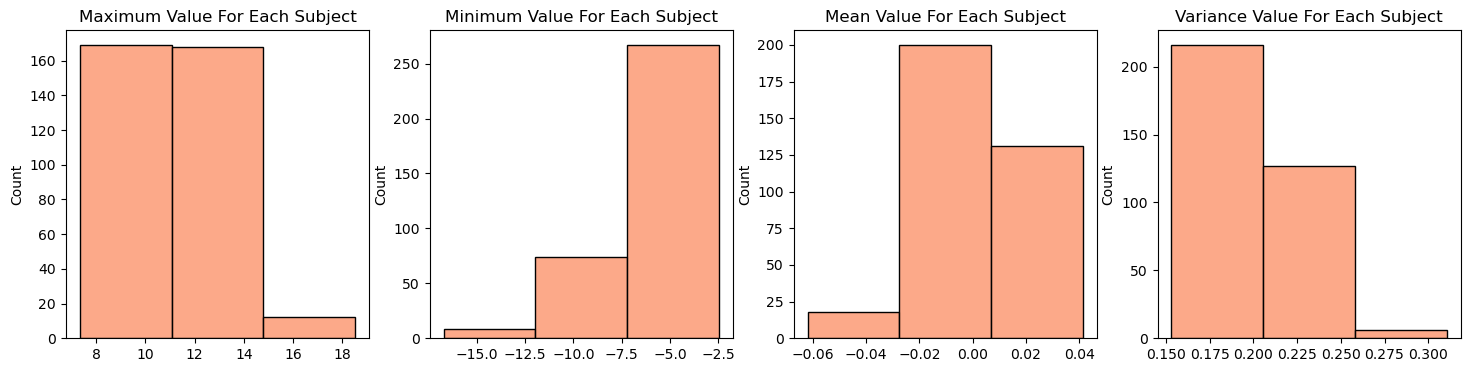

In [76]:
helper.image_report(imges)

     ======== General Information ========
Number of nan voxels: 0
Overall Maximum: 30.3909
Overall Minimum: -0.0007
Overall Mean: -11.3931
Overall Variance: 0.0330


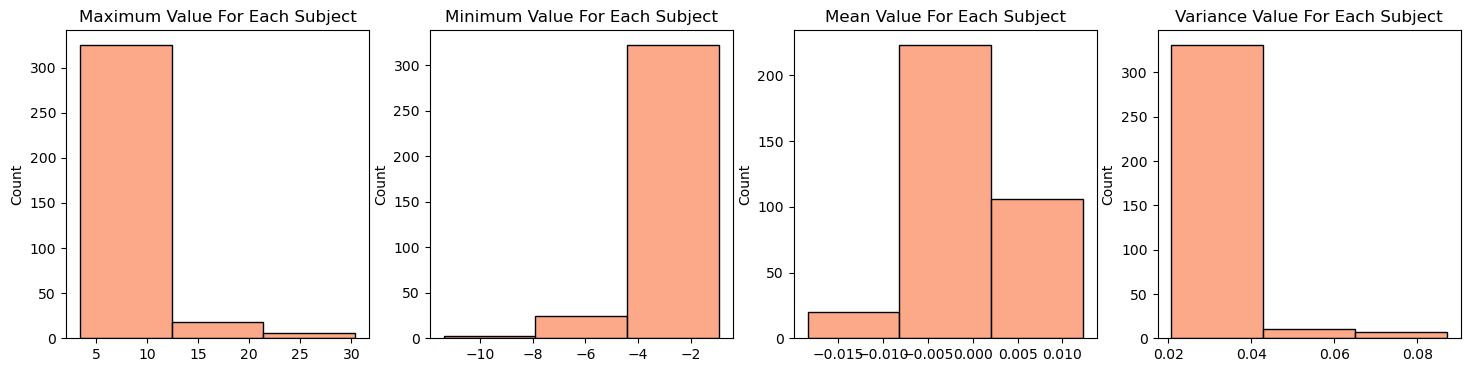

In [77]:
helper.image_report(Original_DBMs)

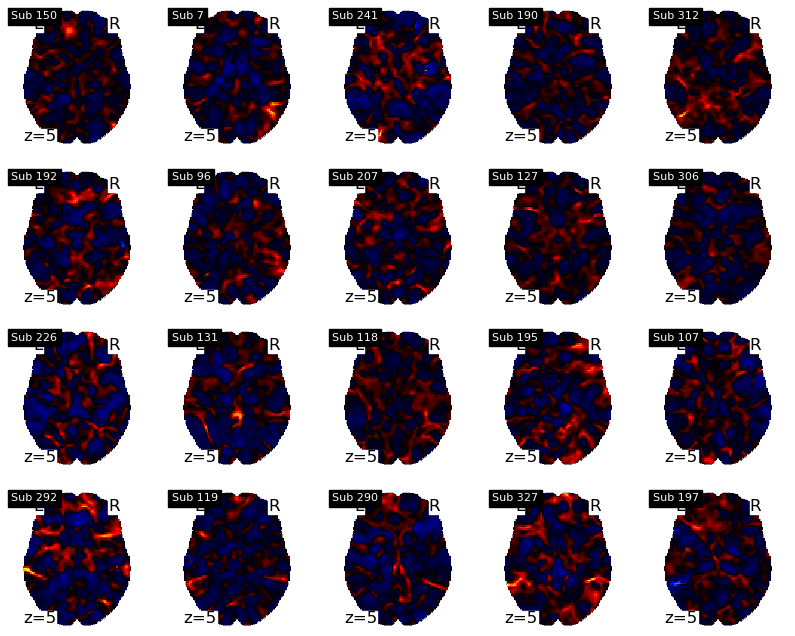

In [78]:
helper.random_plotter(imges, z_slice=[5])

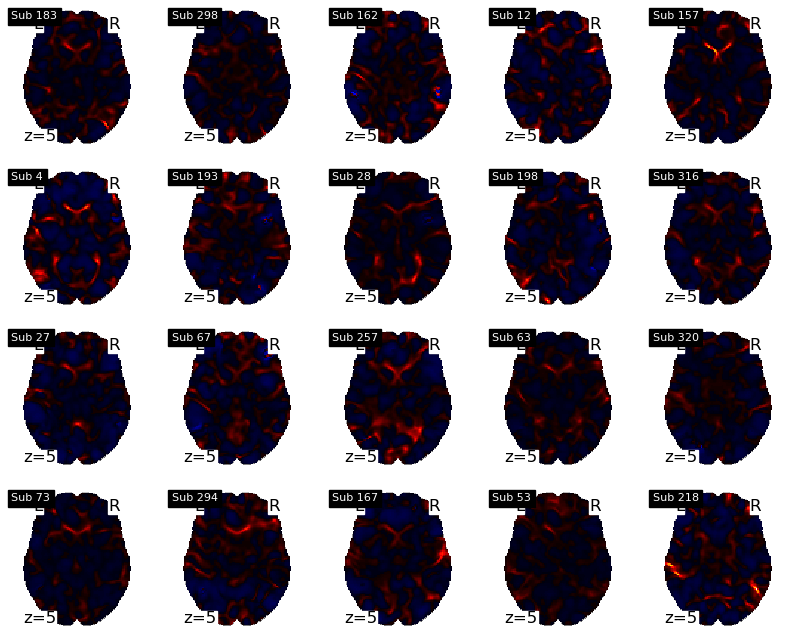

In [79]:
helper.random_plotter(Original_DBMs, z_slice=[5])

In [80]:
from nilearn.decomposition import CanICA

In [81]:
ica_without_mask = CanICA(n_components=30,
        memory="nilearn_cache", memory_level=2,
        mask_strategy='whole-brain-template',
        do_cca=False,
        random_state=0,
        standardize=True, 
        standardize_confounds=True,
        )
ica_without_mask.fit(Original_DBMs)

/data/origami/niusha/miniconda3/lib/python3.9/site-packages/joblib/memory.py:632: UserWarning: Cannot inspect object functools.partial(<function compute_multi_brain_mask at 0x7fed2e300550>, mask_type='whole-brain'), ignore list will not work.
  return hashing.hash(filter_args(self.func, self.ignore, args, kwargs),


CanICA(do_cca=False, mask_strategy='whole-brain-template',
       memory=Memory(location=nilearn_cache/joblib), memory_level=2,
       n_components=30, random_state=0)

In [82]:
ica_without_mask_img = ica_without_mask.components_img_

In [83]:
ica_with_mask = CanICA(n_components=30,
                       memory='nilearn_cache',
                       mask_strategy='whole-brain-template',
                       do_cca=False,
                       random_state=0,
                       standardize=True,
                       standardize_confounds=True,
                       )
ica_with_mask.fit(imges)

/data/origami/niusha/miniconda3/lib/python3.9/site-packages/nilearn/_utils/cache_mixin.py:223: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "
/data/origami/niusha/miniconda3/lib/python3.9/site-packages/nilearn/masking.py:568: UserWarning: Persisting input arguments took 10.42s to run.
If this happens often in your code, it can cause performance problems 
(results will be correct in all cases). 
The reason for this is probably some large input arguments for a wrapped
 function (e.g. large strings).
THIS IS A JOBLIB ISSUE. If you can, kindly provide the joblib's team with an
 example so that they can fix the problem.
  resampled_template = cache(resampling.resample_to_img, memory)(
/data/origami/niusha/miniconda3/lib/python3.9/site-packages/joblib/memory.py:810: UserWarning: Cannot inspect object functools.partial(<function compute_multi_brain_mask at 0x7fed2e30055

CanICA(do_cca=False, mask_strategy='whole-brain-template',
       memory=Memory(location=nilearn_cache/joblib), memory_level=1,
       n_components=30, random_state=0)

In [84]:
ica_with_mask_img = ica_with_mask.components_img_

     ======== General Information ========
Number of nan voxels: 0
Overall Maximum: 0.0164
Overall Minimum: 0.0000
Overall Mean: -0.0122
Overall Variance: 0.0000


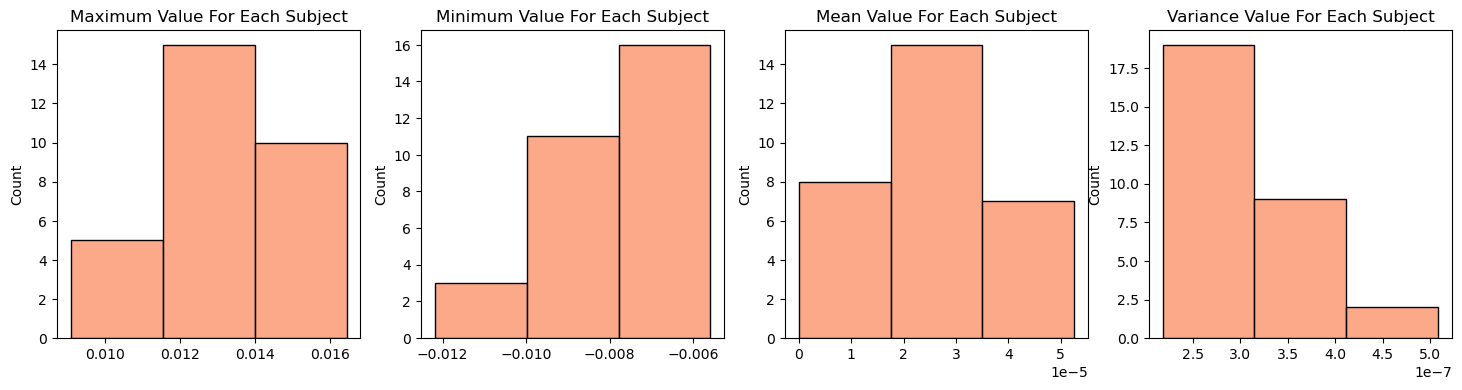

In [85]:
helper.image_report(ica_with_mask_img)

     ======== General Information ========
Number of nan voxels: 0
Overall Maximum: 0.0167
Overall Minimum: 0.0000
Overall Mean: -0.0117
Overall Variance: 0.0000


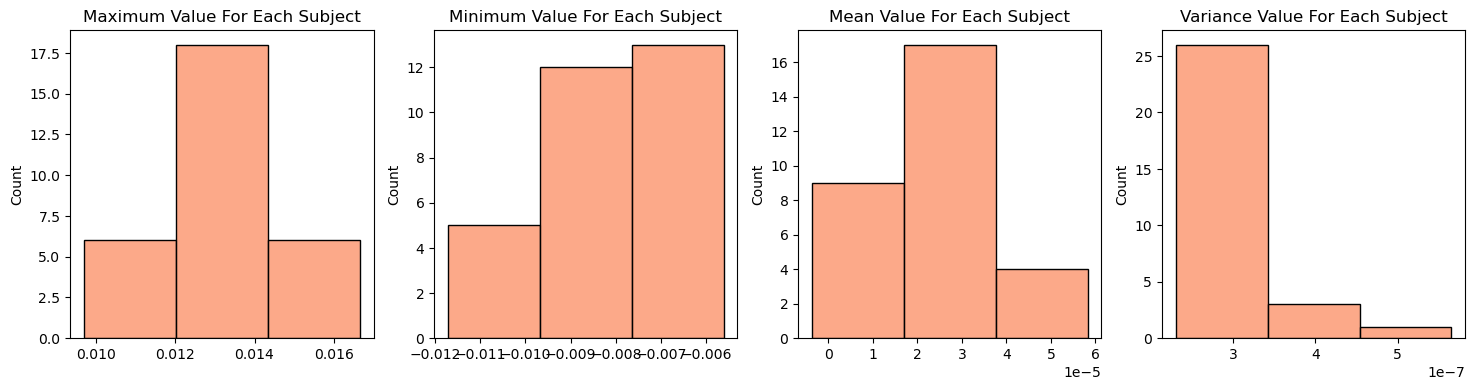

In [86]:
helper.image_report(ica_without_mask_img)

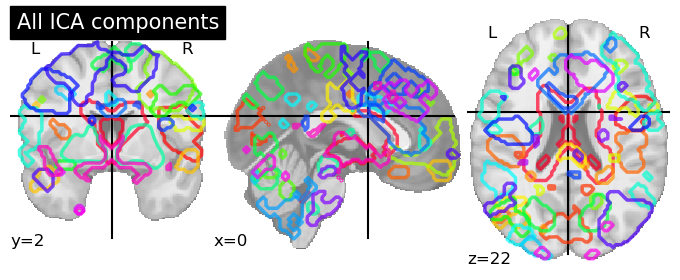

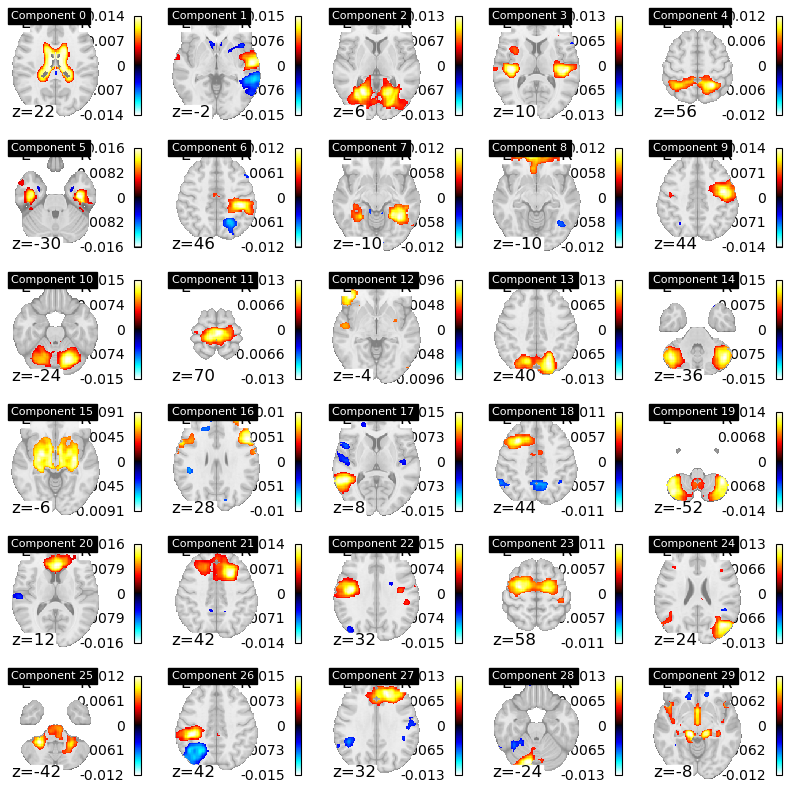

In [87]:
helper.plot_ICA_components(ica_with_mask_img)

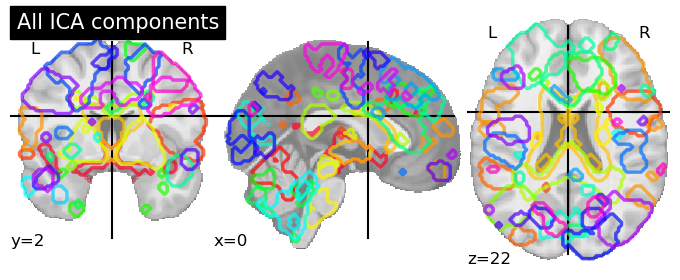

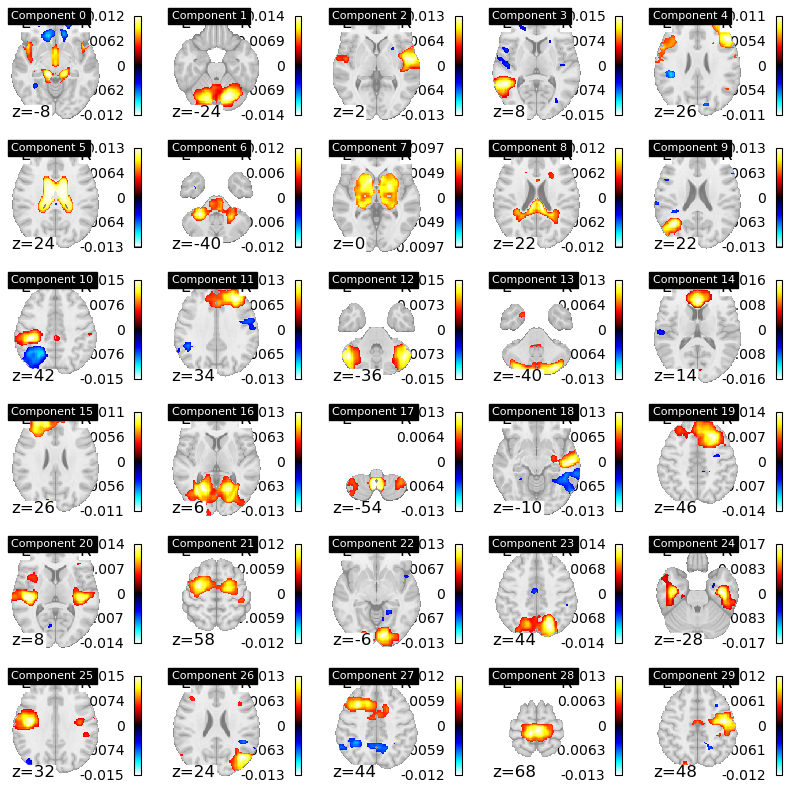

In [88]:
helper.plot_ICA_components(ica_without_mask_img)

In [89]:
ica_with_mask_data = ica_with_mask_img.get_fdata()

In [90]:
import numpy as np

In [91]:
ica_with_mask_data -= np.reshape(ica_with_mask_data.mean(axis=3), newshape=list(ica_with_mask_data.shape[0:3])+[1])

In [92]:
ica_with_mask_data /= np.reshape(ica_with_mask_data.std(axis=3), newshape=list(ica_with_mask_data.shape[0:3])+[1])

/tmp/ipykernel_43219/2562540484.py:1: RuntimeWarning: invalid value encountered in divide
  ica_with_mask_data /= np.reshape(ica_with_mask_data.std(axis=3), newshape=list(ica_with_mask_data.shape[0:3])+[1])


     ======== General Information ========
Number of nan voxels: 30007560
Overall Maximum: 5.3852
Overall Minimum: 0.0000
Overall Mean: -5.3852
Overall Variance: 1.0000


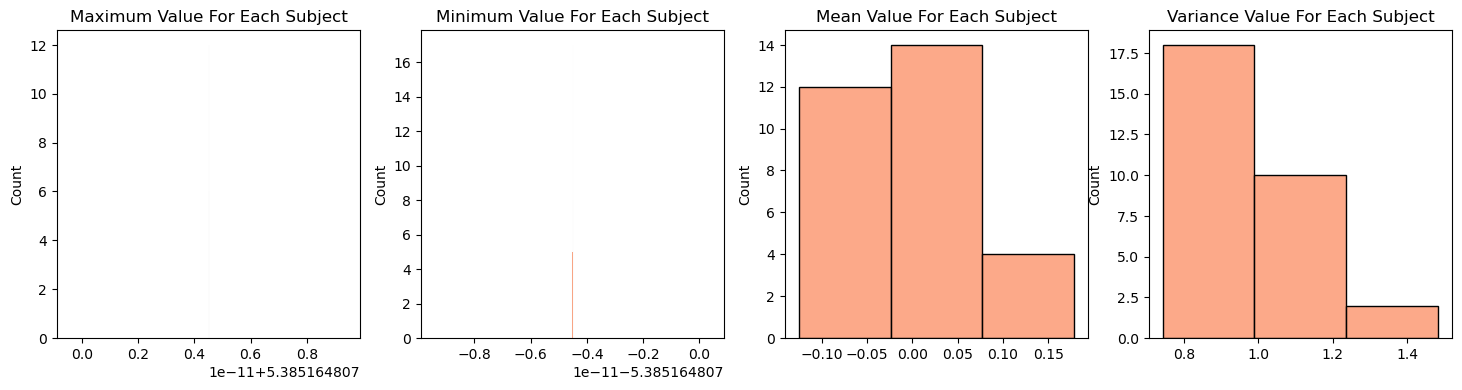

In [93]:
helper.image_report(ica_with_mask_img)

In [94]:
from sklearn.decomposition import FastICA

In [95]:
ica_with_mask_data_version = FastICA(n_components=30,
                       random_state=0,
                       )
data = ica_with_mask_data_version.fit_transform(Original_DBMs_masked_data.T).T

/data/origami/niusha/miniconda3/lib/python3.9/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


In [96]:
immg = nifti_masker.inverse_transform(data)

     ======== General Information ========
Number of nan voxels: 0
Overall Maximum: 0.0159
Overall Minimum: 0.0000
Overall Mean: -0.0185
Overall Variance: 0.0000


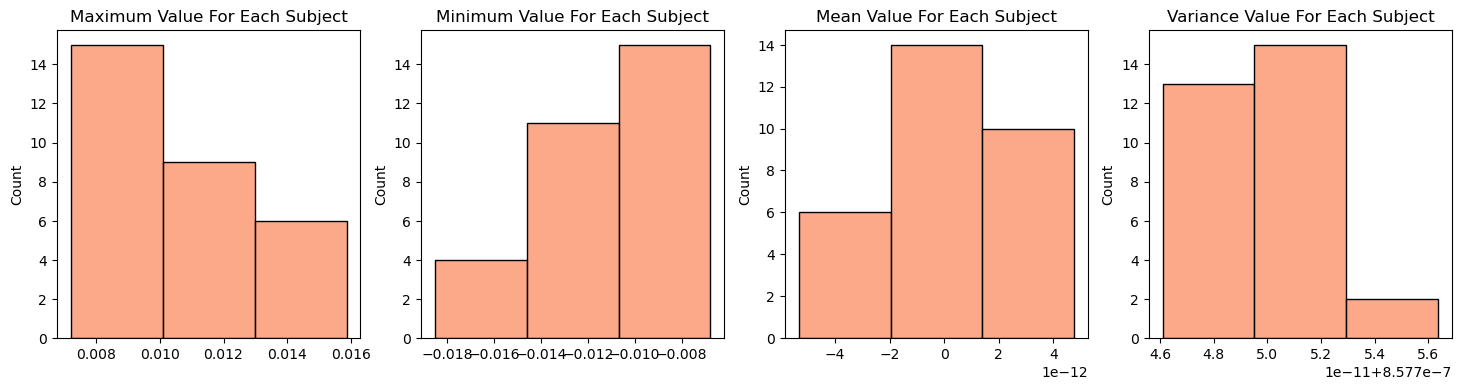

In [97]:
helper.image_report(immg)

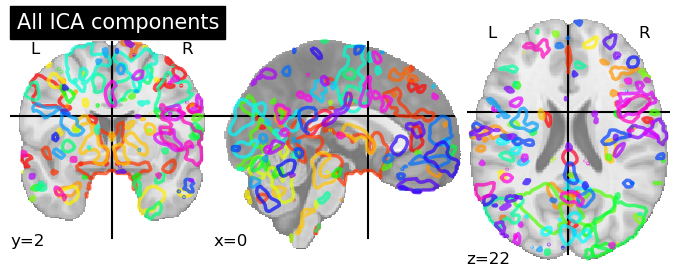

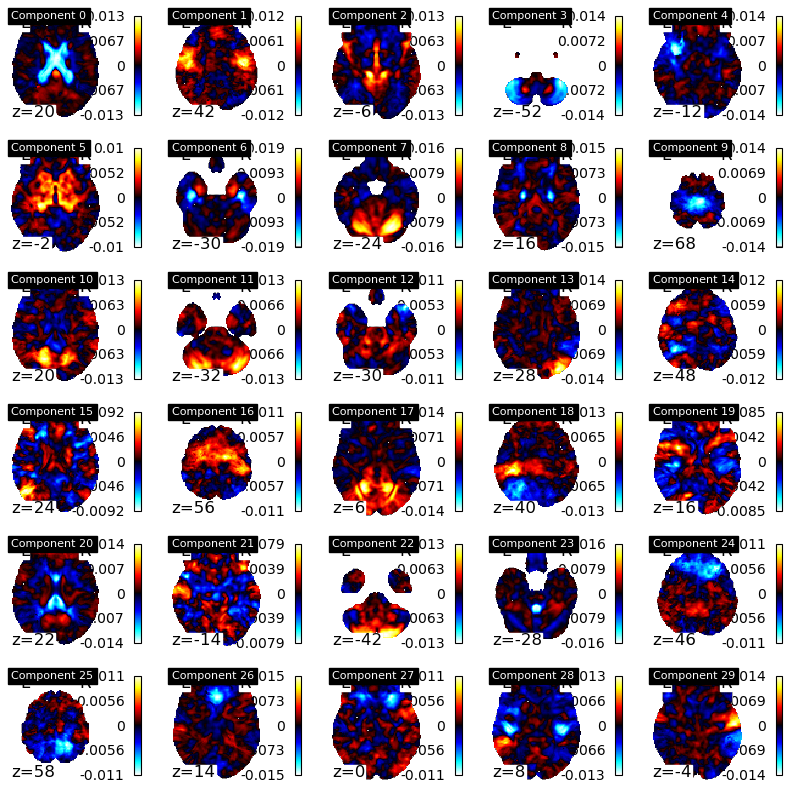

In [98]:
helper.plot_ICA_components(immg)